# Reproducing https://natashabatalha.github.io/picaso/notebooks/10_QueryOpacities.html#How-to-Query-the-Database

In [2]:
import warnings
warnings.filterwarnings('ignore')
import io
import numpy as np
import os
import picaso.opacity_factory as opa
#plotting
import picaso.justplotit as jpi
import picaso.justdoit as jdi

In [3]:
db_filename = os.path.join(os.getenv('picaso_refdata'), 'opacities','opacities.db')

In [4]:
molecules, pt_pairs = opa.molecular_avail(db_filename)
molecules

['CH4',
 'CO',
 'CO2',
 'Cs',
 'H2O',
 'H2S',
 'K',
 'Li',
 'N2O',
 'NH3',
 'Na',
 'O2',
 'O3',
 'PH3',
 'Rb',
 'TiO',
 'VO']

In [7]:
species_to_get = ['H2O']
temperature = list(np.arange(400,1000,10)) #this will find the nearest point for you in the db
pressure = [1]*len(temperature) #in bars
#NOTE: temperature and pressure lists are defined as pairs. The list above is
#grabbing temperatures from 400-1000 all at 1 bar.
data  = opa.get_molecular(db_filename, species_to_get, temperature,pressure)

In [8]:
data.keys()

dict_keys(['H2O', 'wavenumber'])

In [9]:
data['H2O'].keys()

dict_keys([400.0, 425.0, 450.0, 475.0, 500.0, 575.0, 650.0, 725.0, 800.0, 900.0, 1000.0])

In [10]:
data['H2O'][400.0].keys()

dict_keys([1.0])

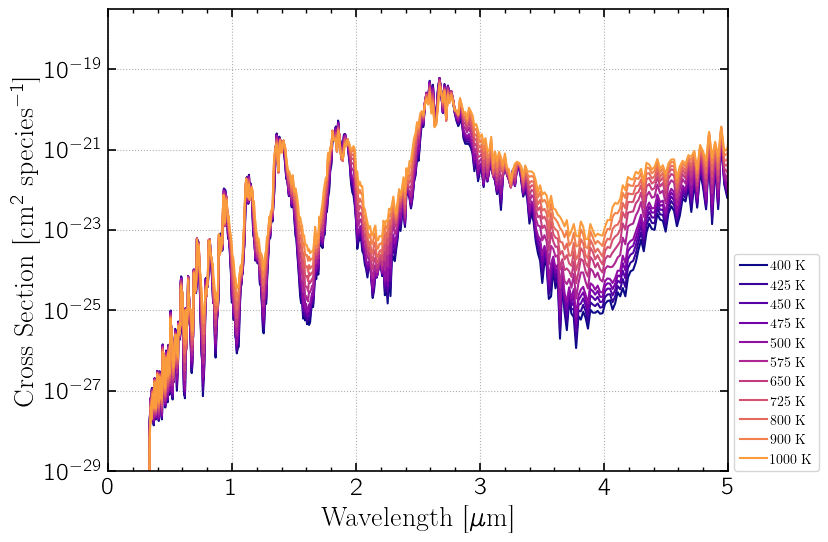

In [21]:
import matplotlib
cmap = matplotlib.cm.get_cmap('plasma')
nspec = len(data['H2O'].keys())
colors = cmap(np.linspace(0,1,nspec+3))

%matplotlib inline
plt.figure()
for T , C in zip(data['H2O'].keys(), colors):
    x,y = jdi.mean_regrid(data['wavenumber'],data['H2O'][T][1.0], R=200)
    plt.plot(1e4/x,y, color=C,label=str(T).replace('.0','')+' K')
    
plt.legend(loc=(1.01,0))
plt.xlabel('Wavelength [$\mu $m]')
plt.ylabel('Cross Section [cm$^2$ species$^{-1}$]')
plt.gca().set_yscale('log')
plt.ylim(bottom = 1e-29)
plt.xlim(right=5, left=0)
plt.grid(ls=':')


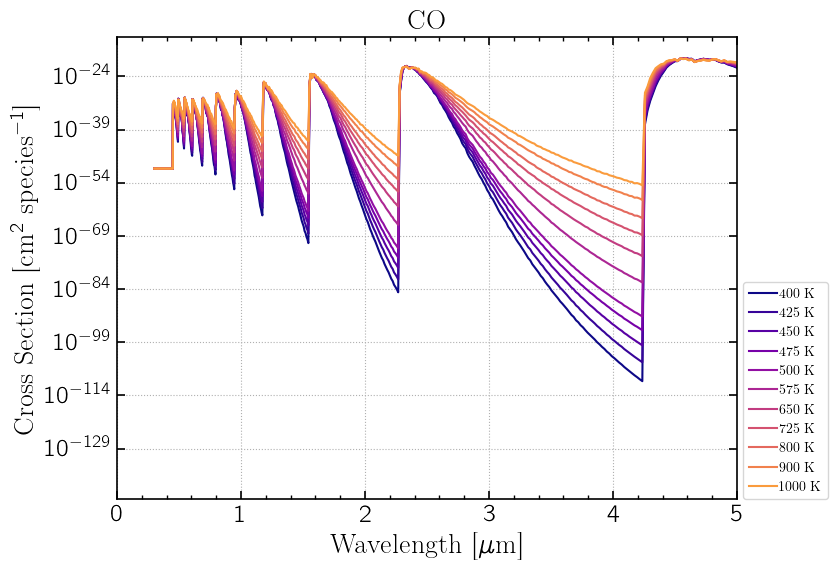

In [24]:
species_to_get = ['H2O','CH4','CO2','NH3','O2','O3', 'H2S', 'CO']
temperature = list(np.arange(400,1000,10)) #this will find the nearest point for you in the db
pressure = [1]*len(temperature) #in bars
#NOTE: temperature and pressure lists are defined as pairs. The list above is
#grabbing temperatures from 400-1000 all at 1 bar.

import matplotlib
cmap = matplotlib.cm.get_cmap('plasma')

for mol in species_to_get:
    
    data  = opa.get_molecular(db_filename, [mol], temperature,pressure)
    nspec = len(data[mol].keys())
    colors = cmap(np.linspace(0,1,nspec+3))

    %matplotlib inline
    plt.figure()
    for T , C in zip(data[mol].keys(), colors):
        x,y = jdi.mean_regrid(data['wavenumber'],data[mol][T][1.0], R=200)
        plt.plot(1e4/x,y, color=C,label=str(T).replace('.0','')+' K')

    plt.legend(loc=(1.01,0))
    plt.xlabel('Wavelength [$\mu $m]')
    plt.ylabel('Cross Section [cm$^2$ species$^{-1}$]')
    plt.gca().set_yscale('log')
    #plt.ylim(bottom = 1e-29)
    plt.xlim(right=5, left=0)
    plt.title(mol)
    plt.grid(ls=':')
    plt.savefig('modeling/AbsorptionFeatures/'+mol+'.png')
